In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv("Cardiac_risk.csv")

In [3]:
d

,id,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,168,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,158,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,183,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,163,72.0,135,80,107.5,1,2,0,0,0,1


In [4]:
d.columns

Index(['id', 'age in days', 'age', 'gender', 'height_in_cm', 'weight_in_kg',
       'bp_hi', 'bp_lo', 'avg_heart_rate', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
d["height_in_cm"] = d['height_in_cm']/100
d = d.rename(columns={"height_in_cm": "Height_in_Meters"})
d

,id,age in days,age,gender,Height_in_Meters,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,1.68,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,1.56,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,1.65,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,1.69,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,1.56,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,1.68,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,1.58,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,1.83,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,1.63,72.0,135,80,107.5,1,2,0,0,0,1


In [6]:
d["Height_in_Meters"] = d["Height_in_Meters"]**2
d = d.rename(columns={"Height_in_Meters": "Height_in_Meters_sq"})
d

,id,age in days,age,gender,Height_in_Meters_sq,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,2.4336,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,2.8224,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,2.4964,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,3.3489,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,2.6569,72.0,135,80,107.5,1,2,0,0,0,1


In [7]:
BMI = (d.weight_in_kg/d.Height_in_Meters_sq)
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [8]:
d.insert(4, "BMI",BMI)
d

,id,age in days,age,gender,BMI,Height_in_Meters_sq,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,21.967120,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,34.927679,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,23.507805,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,28.710479,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,23.011177,2.4336,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,26.927438,2.8224,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,50.472681,2.4964,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,31.353579,3.3489,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,27.099251,2.6569,72.0,135,80,107.5,1,2,0,0,0,1


In [9]:
d.columns

Index(['id', 'age in days', 'age', 'gender', 'BMI', 'Height_in_Meters_sq',
       'weight_in_kg', 'bp_hi', 'bp_lo', 'avg_heart_rate', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [10]:
d['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

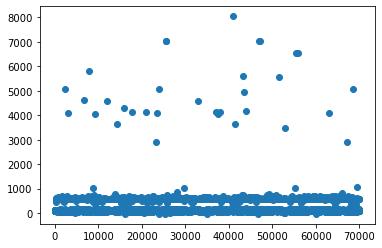

In [11]:
import matplotlib.pyplot as plt
plt.scatter(d.index, d['avg_heart_rate'])

In [12]:
d =d.loc[(d['avg_heart_rate']>50) & (d['avg_heart_rate']<200)]
d.shape[0]

68869

In [13]:
d.shape

(68869, 16)

In [14]:
d.head()

,id,age in days,age,gender,BMI,Height_in_Meters_sq,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,21.967120,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,34.927679,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,23.507805,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,28.710479,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,23.011177,2.4336,56.0,100,60,80.0,1,1,0,0,0,0


In [15]:
d=d.drop(['id'], axis=1)
d.reset_index(drop=True,inplace=True)


In [16]:
d.head()

,age in days,age,gender,BMI,Height_in_Meters_sq,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,18393,52,2,21.967120,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,20228,57,1,34.927679,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,18857,53,1,23.507805,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,17623,50,2,28.710479,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,17474,49,1,23.011177,2.4336,56.0,100,60,80.0,1,1,0,0,0,0


In [17]:
encoder = preprocessing.LabelEncoder()

for i in d.columns:
    if isinstance(d[i][0], str):
            data[i] = encoder.fit_transform(d[i])

In [18]:
d.head()

,age in days,age,gender,BMI,Height_in_Meters_sq,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,18393,52,2,21.967120,2.8224,62.0,110,80,95.0,1,1,0,0,1,0
1,20228,57,1,34.927679,2.4336,85.0,140,90,115.0,3,1,0,0,1,1
2,18857,53,1,23.507805,2.7225,64.0,130,70,100.0,3,1,0,0,0,1
3,17623,50,2,28.710479,2.8561,82.0,150,100,125.0,1,1,0,0,1,1
4,17474,49,1,23.011177,2.4336,56.0,100,60,80.0,1,1,0,0,0,0


In [19]:
d.active.value_counts()

1    55327
0    13542
Name: active, dtype: int64

In [20]:
li = d[d['cardio']==0].sample(2000).index
li

Int64Index([43398,  8690, 40159, 28488, 59259, 21669, 53688, 62053,  2263,
            25360,
            ...
            56164, 44582, 19458, 22206, 22504, 22619, 27227, 39526,  6289,
            49745],
           dtype='int64', length=2000)

In [21]:
d = d.drop(li, axis = 0)
d.cardio.value_counts()

1    34097
0    32772
Name: cardio, dtype: int64

In [22]:
X = d.drop(['cardio'], axis=1)
y = d['cardio']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [25]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [26]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head()

,Actual,Predicted
34455,1,1
40028,0,0
65643,0,0
49515,0,1
30762,1,1


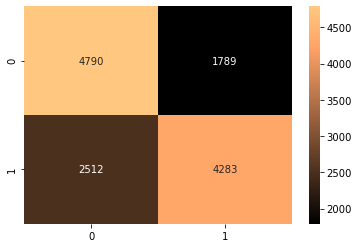

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

conf=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(conf), annot=True,fmt='g',cmap='copper');

In [28]:
print('CLassification Report:\n', classification_report(y_test,y_pred))

CLassification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69      6579
           1       0.71      0.63      0.67      6795

    accuracy                           0.68     13374
   macro avg       0.68      0.68      0.68     13374
weighted avg       0.68      0.68      0.68     13374



In [29]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

In [30]:
auc

0.7270009342500683

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

y_pred=decision.predict(X_test)

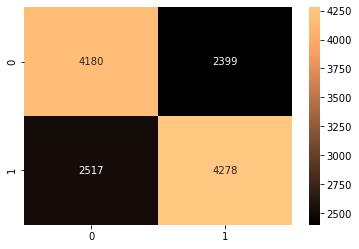

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

conf=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(conf), annot=True,fmt='g',cmap='copper');

In [33]:
print('CLassification Report:\n', classification_report(y_test,y_pred))

CLassification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63      6579
           1       0.64      0.63      0.64      6795

    accuracy                           0.63     13374
   macro avg       0.63      0.63      0.63     13374
weighted avg       0.63      0.63      0.63     13374



In [34]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(X_train,y_train)

y_predf=forest.predict(X_test)

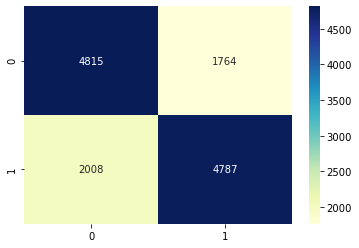

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

conf=confusion_matrix(y_test,y_predf)
sns.heatmap(pd.DataFrame(conf), annot=True,fmt='g',cmap='YlGnBu');

In [36]:
print('CLassification Report:\n', classification_report(y_test,y_predf))

CLassification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      6579
           1       0.73      0.70      0.72      6795

    accuracy                           0.72     13374
   macro avg       0.72      0.72      0.72     13374
weighted avg       0.72      0.72      0.72     13374



In [37]:
from sklearn.naive_bayes import GaussianNB
bayes=GaussianNB()

bayes.fit(X_train,y_train)
y_predn=bayes.predict(X_test)

In [38]:
bayes.score(X_train,y_train)

0.712216094962146

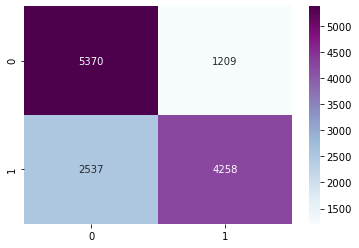

In [39]:
conf=confusion_matrix(y_test,y_predn)
sns.heatmap(pd.DataFrame(conf), annot=True, fmt='g', cmap='BuPu');

In [40]:
print('CLassification Report: \n', classification_report(y_test,y_predn))

CLassification Report: 
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      6579
           1       0.78      0.63      0.69      6795

    accuracy                           0.72     13374
   macro avg       0.73      0.72      0.72     13374
weighted avg       0.73      0.72      0.72     13374



In [ ]:
from sklearn.svm import SVC
vector=SVC(kernel='rbf', C=2, gamma=5)
vector.kernel

In [ ]:
vector.fit(X_train,y_train)

In [ ]:
vector.score(X_train,y_train)

In [ ]:
y_predvc=vector.predict(X_test)

In [ ]:
print('Classification Report: \n', classification_report(y_test,y_predvc))